In [1]:
import json

with open('/Users/sunnyyu/Desktop/Children_Speech_Books_NLP/data/data_with_all_info/MERGED_DATA_SPEECH.json', 'r') as file:
    generics_data = json.load(file)

In [2]:
# import the classified file with 1-5 feature categories

with open('/Users/sunnyyu/Desktop/Children_Speech_Books_NLP/code/Python/analysis_files/GENERIC_FEATURE_SPEECH.json', 'r') as file:
    features = json.load(file)

In [2]:
# merge universal and existential quantifiers

import json

# Load the first JSON file
with open('/Users/sunnyyu/Desktop/research/children_speech_books/code/python/generics/EXISTENTIAL_QUANTIFIERS_FEATURES_SPEECH.json', 'r') as f1:
    data1 = json.load(f1)

# Load the second JSON file
with open('/Users/sunnyyu/Desktop/research/children_speech_books/code/python/generics/UNIVERSAL_QUANTIFIERS_FEATURES_SPEECH.json', 'r') as f2:
    data2 = json.load(f2)

# Merge the data using extend
data1.extend(data2)

# # Save the merged data to a new JSON file
# with open('QUANTIFIERS_BOOKS.json', 'w') as outfile:
#     json.dump(data1, outfile, indent=4)

# print("Files merged successfully!")

In [3]:
# join the information into one json object

# Create a mapping of sentences to their tags and subjects from generics_data
sentence_map = {}
for entry in generics_data:
        sentence = entry['sentence']
        tags = entry.get('tags', [])
        subjects = entry.get('subjects', [])
        age_min = entry['age_min'],
        age_max = entry['age_max'],
        sentence_map[sentence] = {'tags': tags, 'subjects': subjects, 'age_min': age_min, 'age_max': age_max}

# Combine data
combined_data = []
for feature in features:
    sentence = feature['sentence']
    classification = feature['classification']



    # Find the corresponding tags and subjects
    if sentence in sentence_map:
        combined_entry = {
            'sentence': sentence,
            'tags': sentence_map[sentence]['tags'],
            'subjects': sentence_map[sentence]['subjects'],
            'classification': classification,
            'age_min': sentence_map[sentence]['age_min'][0],
            'age_max': sentence_map[sentence]['age_max'][0]
        }
        combined_data.append(combined_entry)

# # Save the combined data to a new JSON file
# with open('features_speech_habituals.json', 'w') as f:
#     json.dump(combined_data, f, indent=4)

# print("Combined data saved to 'combined_data.json'")

# # now features.json is the combined_data for generalizing sentences, not generics


In [4]:
len(combined_data)

6329

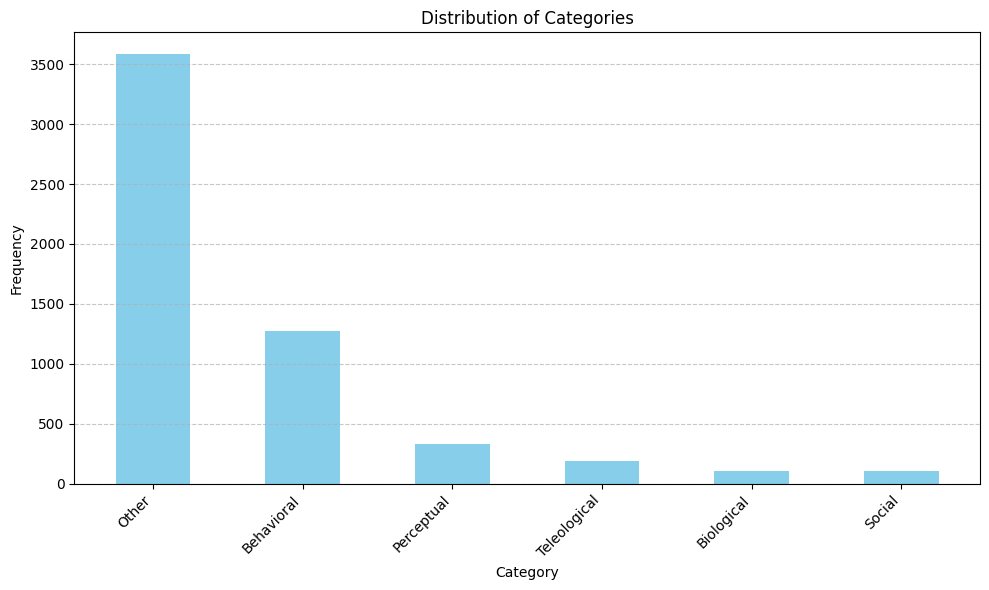

In [13]:
# distribution of the 5 generic types

import json
import matplotlib.pyplot as plt
from collections import Counter
# Extract categories
categories = [book['classification'] for book in combined_data]

# Count the occurrences of each category
category_counts = Counter(categories)

# Mapping of category numbers to descriptive names
category_names = {
    "Behavioral": 'Behavioral',
    "Biological": 'Biological',
    "Social": 'Social',
    "Teleological": 'Teleological',
   "Perceptual": 'Perceptual',
   "Other": 'Other'
}



# Replace category numbers with names
category_counts_named = {category_names[k]: v for k, v in category_counts.items()}

# Plot the distribution of categories
plt.figure(figsize=(10, 6))
plt.bar(category_counts_named.keys(), category_counts_named.values(), width=0.5, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Distribution of Categories')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





In [6]:
import json
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

# Extract categories for overall distribution (handling multi-class)
categories = []
for book in combined_data:
    classification = book['classification']
    if classification:  # Ensure classification exists and is not empty
        classification_list = [int(x) for x in classification.split(',')]
        classification = [cat for cat in classification if cat != 0]
        categories.extend(classification)  # Add all classifications to the list

# Count the occurrences of each category
category_counts = Counter(categories)

# Mapping of category numbers to descriptive names
category_names = {
    1: 'Behavioral',
    2: 'Biological',
    3: 'Social',
    4: 'Teleological',
    5: 'Perceptual',
}

# Replace category numbers with names for overall distribution
category_counts_named = {category_names[k]: v for k, v in category_counts.items()}

# Calculate total counts for normalization
total_overall = sum(category_counts.values())

# Normalize overall counts to proportions
category_proportions_named = {k: v / total_overall for k, v in category_counts_named.items()}

# Initialize the dictionary to store counts for each entity type
tag_categories = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        classification = sentence_data.get('classification')
        
        if classification:  # Only process if classification exists
            for category_num in classification:  # Process each category in the list
                if category_num in category_names:  # Only process valid categories
                    for subject_info in subjects:
                        subject = subject_info['subject'].lower()
                        if subject not in excluded_pronouns:
                            for tag in tags:
                                if subject == tag['word'].lower():
                                    entity = tag['entity']
                                    if entity in tag_categories:
                                        tag_categories[entity][category_names[category_num]] += 1

# Process the combined data
process_book(combined_data)

# Convert defaultdict to dict for better readability and replace category numbers with names
for entity in tag_categories:
    total_entity = sum(tag_categories[entity].values())
    tag_categories[entity] = {category: v / total_entity for category, v in tag_categories[entity].items()}

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
x = range(len(tag_categories))  # Kinds will now be on the x-axis
width = 0.15  # Width of the bars

# Prepare the data for plotting
kinds = list(tag_categories.keys())  # Non-Living Kind, Social Kind/Role, Biological Kind, Artifacts
categories = list(category_names.values())  # Behavioral, Biological, Social, etc.

# Create bars for each category
offset = 0
for category in categories:
    proportions = [tag_categories[kind].get(category, 0) for kind in kinds]
    ax.bar([xi + offset for xi in x], proportions, width=width, label=category)
    offset += width  # Set labels and title

ax.set_xlabel('Kinds', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)
ax.set_title('Distribution of Features by Kind For Books (Habituals)', fontsize=16)
ax.set_xticks([xi + width for xi in x])
ax.set_xticklabels(kinds, fontsize=12)
ax.legend(title="Categories")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


ValueError: invalid literal for int() with base 10: 'خمسة'

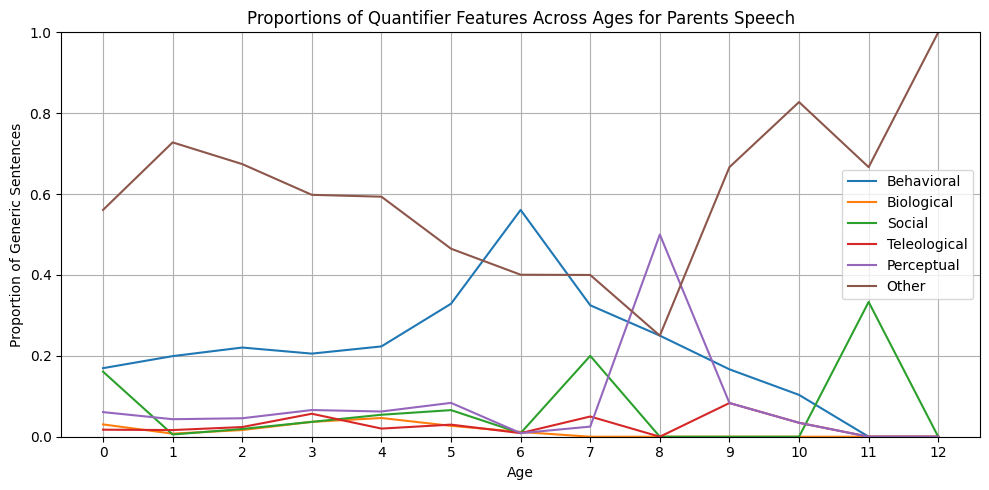

In [23]:
# just one line showing the change across age
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import math

# Mapping of category numbers to descriptive names
category_names = {
    "Behavioral": 'Behavioral',
    "Biological": 'Biological',
    "Social": 'Social',
    "Teleological": 'Teleological',
   "Perceptual": 'Perceptual',
   "Other": 'Other'
}

# Initialize the dictionary to store counts for each entity type by age
tag_categories_by_age = {
    'Non-Living Kind': defaultdict(lambda: defaultdict(int)),
    'Social Kind/Role': defaultdict(lambda: defaultdict(int)),
    'Biological Kind': defaultdict(lambda: defaultdict(int)),
    'Artifacts': defaultdict(lambda: defaultdict(int)),
    'Overall': defaultdict(lambda: defaultdict(int))
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('classification')
        age_min = sentence_data.get('age_min')
        age_max = sentence_data.get('age_max')
        if age_min is None or age_max is None or math.isnan(age_min) or math.isnan(age_max):
            continue
        age_min = int(age_min)
        age_max = int(age_max)
        
        for age in range(age_min, age_max + 1):
            for subject_info in subjects:
                subject = subject_info['subject'].lower()
                if subject not in excluded_pronouns:
                    for tag in tags:
                        if subject == tag['word'].lower():
                            entity = tag['entity']
                            if entity in tag_categories_by_age:
                                tag_categories_by_age[entity][age][category] += 1
                            tag_categories_by_age['Overall'][age][category] += 1

# Process the combined data
process_book(combined_data)

# Function to calculate overall proportions for each category by age
def calculate_overall_category_proportions(category_name):
    proportions = []
    for age in age_ranges:
        total_count = sum(tag_categories_by_age['Overall'][age].values())
        if total_count == 0:
            proportions.append(0)
        else:
            category_count = tag_categories_by_age['Overall'][age].get(category_name, 0)
            proportions.append(category_count / total_count)
    return proportions

# Plot the proportions for each category across ages
age_ranges = range(0, 13)  # Assuming age ranges from 0 to 17
plt.figure(figsize=(10, 5))

for category_num, category_name in category_names.items():
    proportions = calculate_overall_category_proportions(category_num)
    plt.plot(age_ranges, proportions, label=category_name)

plt.title('Proportions of Quantifier Features Across Ages for Parents Speech')
plt.xlabel('Age')
plt.ylabel('Proportion of Generic Sentences')
plt.xticks(age_ranges)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
import json
from collections import defaultdict

# Initialize the dictionary to store counts and sentences using sets to avoid duplicates
tag_categories = {
    'Non-Living Kind': defaultdict(lambda: {'count': 0, 'sentences': set()}),
    'Social Kind/Role': defaultdict(lambda: {'count': 0, 'sentences': set()}),
    'Biological Kind': defaultdict(lambda: {'count': 0, 'sentences': set()}),
    'Artifacts': defaultdict(lambda: {'count': 0, 'sentences': set()})
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        sentence = sentence_data['sentence']
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('classification')
        
        for subject_info in subjects:
            subject = subject_info['subject'].lower()
            if subject not in excluded_pronouns:  # Check if the subject is not a pronoun
                for tag in tags:
                    if subject == tag['word'].lower():
                        entity = tag['entity']
                        if entity in tag_categories:
                            tag_categories[entity][category]['count'] += 1
                            tag_categories[entity][category]['sentences'].add(sentence)  # Add sentence to set

process_book(combined_data)

# Function to save sentences for each category and entity to a file
def save_sentences_by_category(filename):
    with open(filename, 'w') as file:
        for entity, categories in tag_categories.items():
            file.write(f"Entity: {entity}\n")
            for category, data in categories.items():
                file.write(f"  Category {category}: Count = {data['count']}, Sentences:\n")
                for sentence in sorted(data['sentences']):  # Sort sentences for consistent order
                    file.write(f"    - {sentence}\n")
            file.write("\n")  # Add a newline for better separation between entities

save_sentences_by_category("entity_category_sentences_speech_generics.txt")